In [19]:
import cv2 #for opencv

In [20]:
import matplotlib.pyplot as plt

In [21]:
config_file = 'ssd_mobilenet_v3_large_coco.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [36]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)


In [23]:
classObjects = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classObjects = fpt.read().rstrip('\n').split('\n')

In [24]:
print(classObjects)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier']


In [25]:
print(len(classObjects))

79


In [26]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001E64E1870B0>

# read an image

In [27]:
img = cv2.imread('Input/download (1).jpg')

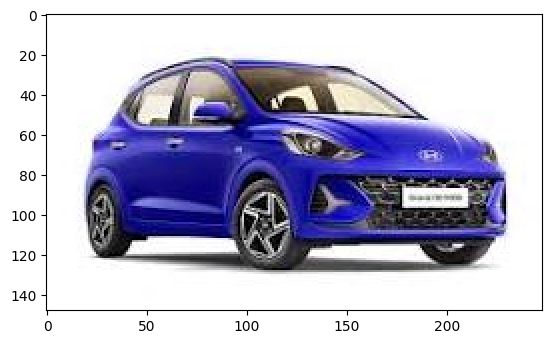

In [28]:
plt.imshow(img) ##bgr

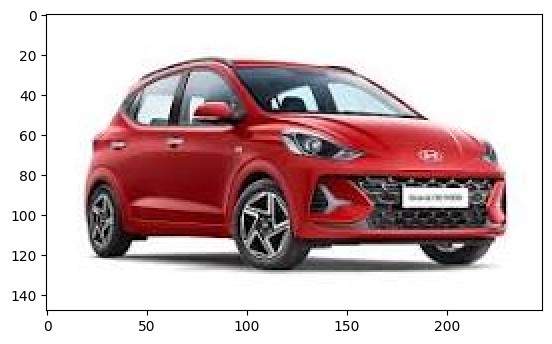

In [29]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) 

In [30]:
 ClassIndex, confidece, bbox = model.detect(img,confThreshold = 0.5)

In [31]:
print(ClassIndex)

[3]


In [32]:
font_scale = 3
font= cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf ,boxes in zip(ClassIndex.flatten(), confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classObjects[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0), thickness =3 )
    

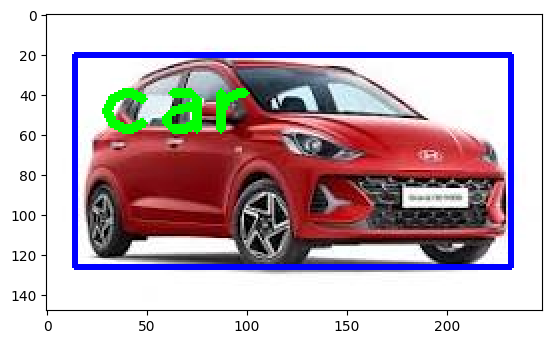

In [33]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## video demo

In [34]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
        raise IOError("Cannot open video")
        
font_scale =3
Font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold = 0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf ,boxes in zip(ClassIndex.flatten(), confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classObjects[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0), thickness =3 )
    
    cv2.imshow('Object Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()        

OSError: Cannot open video